In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

%load_ext lab_black

# Beta plots*

From [Unit 4: betaplots.m](https://raw.githubusercontent.com/areding/6420-pymc/main/original_examples/Codes4Unit4/betaplots.odc).

Associated lecture video: Unit 4 lesson 7.

It would probably faster to use scipy for these plots, but going to stick with PyMC so I don't have to worry about looking up parameterization differences.

Also, check out https://colcarroll.github.io/updating_beta/ for a cool visualization of the beta distribution.

In [2]:
params = [
    (0.5, 0.5),
    (1, 1),
    (2, 2),
    (10, 10),
    (1, 5),
    (1, 0.4),
    (3, 5),
    (50, 30),
    (5000, 3000),
    (500, 500),
]


def beta_dist(α, β, n):
    # note: new pymc 4.0 syntax uses pm.draw() function
    # may be somewhat slower... need to check if this is the right way
    name = f"{α=}, {β=}"
    return pm.draw(pm.Beta(name, α, β), n), name


with pm.Model() as _:
    n = 1000000
    distributions = [beta_dist(α, β, n) for α, β in params]

/var/folders/pm/9z29qnf508bc1v6q8fksblm40000gn/T/ipykernel_65423/1352320288.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, i + 1, autoscalex_on=False)


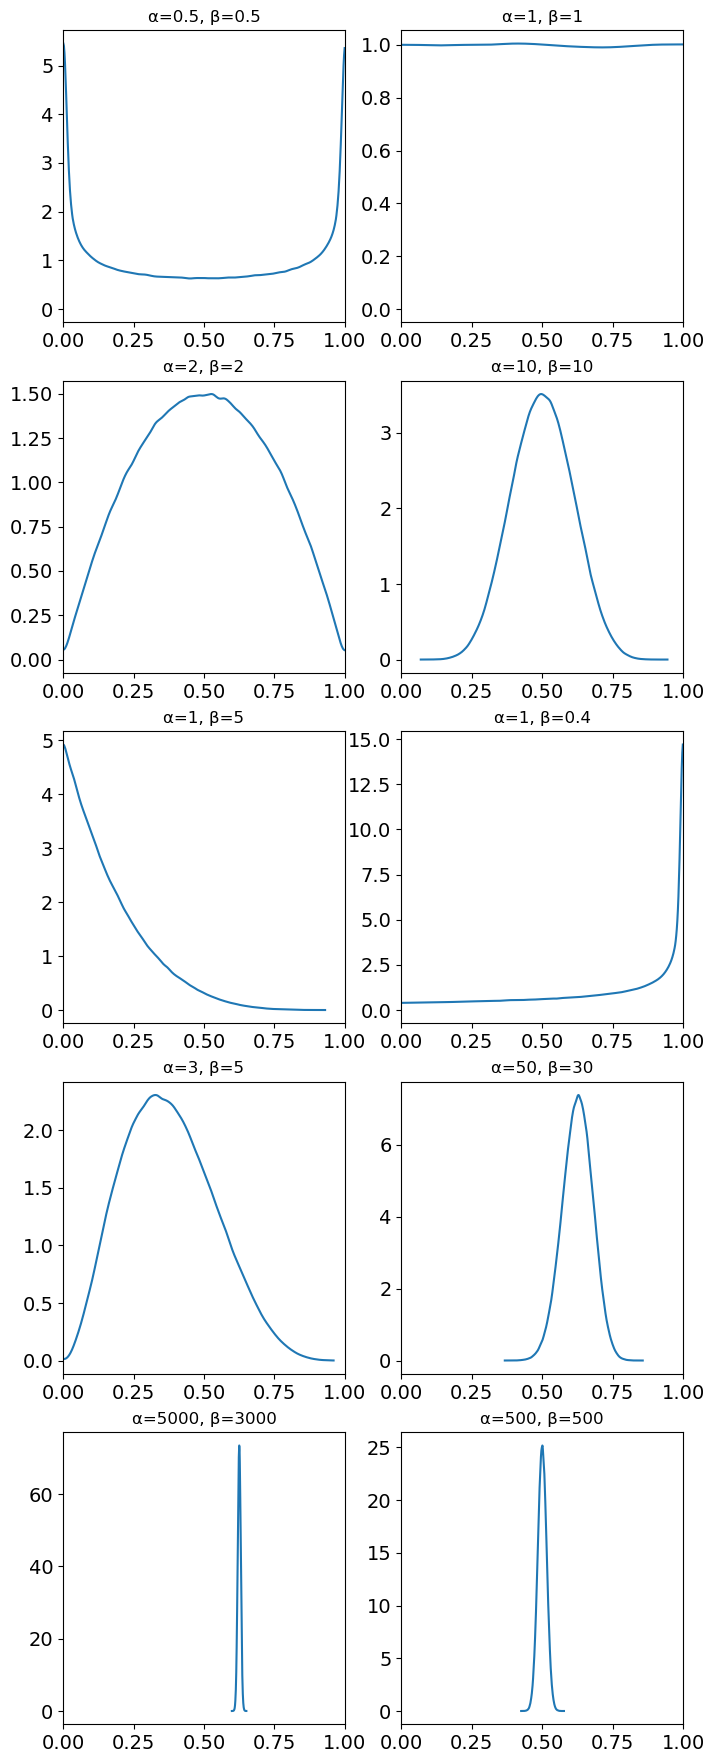

In [3]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(8, 22), sharex="col")

for i, dist in enumerate(distributions):
    plt.subplot(5, 2, i + 1, autoscalex_on=False)
    az.plot_dist(dist[0], figsize=(2, 2))
    plt.title(dist[1])

plt.xlim(0, 1)
plt.show()

```{note} 
You can now sample from PyMC distributions without using the context manager by using the ```.dist``` method. For example:
```

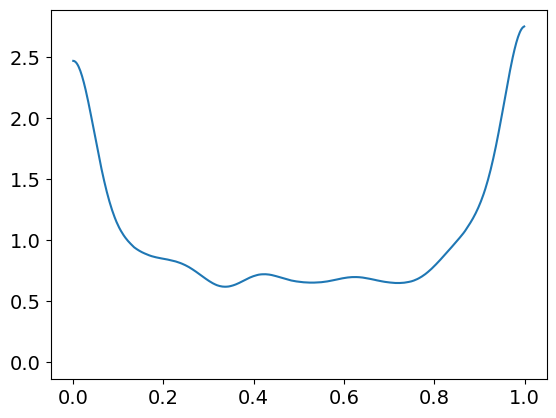

In [4]:
draws = pm.draw(pm.Beta.dist(0.5, 0.5), 1000)
az.plot_dist(draws)
plt.show()

In [5]:
%load_ext watermark
%watermark -n -u -v -iv -p pytensor

Last updated: Sat Mar 18 2023

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.9.0

pytensor: 2.10.1

pymc      : 5.1.1
arviz     : 0.14.0
numpy     : 1.24.2
matplotlib: 3.6.3

